<p align="center" style="background-color: white;">
  <img src="https://www.groupe-gema.com/wp-content/uploads/2023/06/logo__gema.svg" alt="GEMA" style="width: 600px; height: auto;">
</p>

<div style="background-color: #3F579F; color: white; padding: 10px;" id="1">
<h1> <center> B2 - Introduction au traitement de l'image </center> </h1>
</div>

<h5><center> Mars 2025 </center></h5>
<h5><center> C. Sureda G. </center></h5>

---

**<h3>Exercices Chapitre 3: Histogramme</h3>**

---

In [1]:
#Import de librairies nécessaires pour ce chapitre

from PIL import Image        # Permet de charger, traiter et sauvegarder plusieurs formats d'images différents.
from PIL import ImageOps     # Fournit des opérations de traitement d'image telles que le recadrage, le retournement, ou la rotation.
from PIL import ImageEnhance # Offre des fonctions pour ajuster les propriétés des images, telles que la couleur, le contraste, la luminosité et la netteté.

# NumPy est une bibliothèque pour le calcul scientifique en Python.
import numpy as np           # Elle est largement utilisée pour la manipulation de grands tableaux et matrices multidimensionnelles, comme une image.

# Matplotlib est une bibliothèque utilisée pour créer des figures et des graphiques.
import matplotlib.pyplot as plt

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
1. Associer une image à son histogramme
</div>

Pouvez-vous associer chaque histogramme à l'image qui lui correspond?

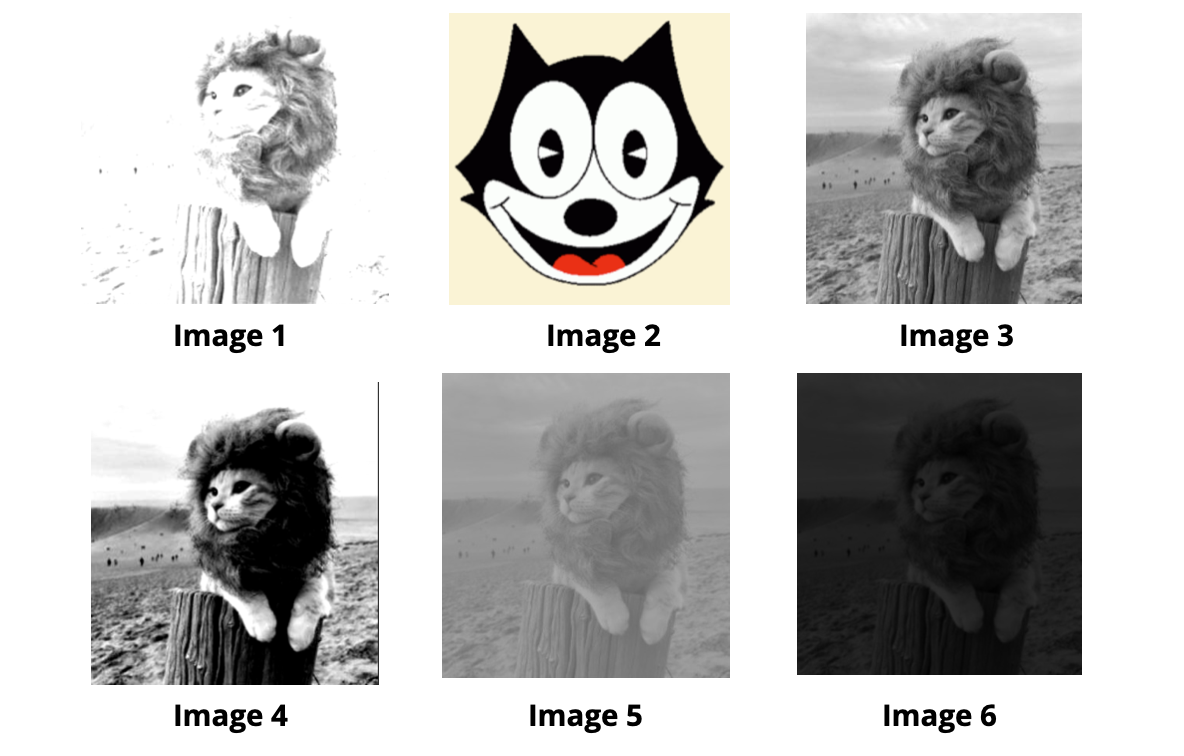

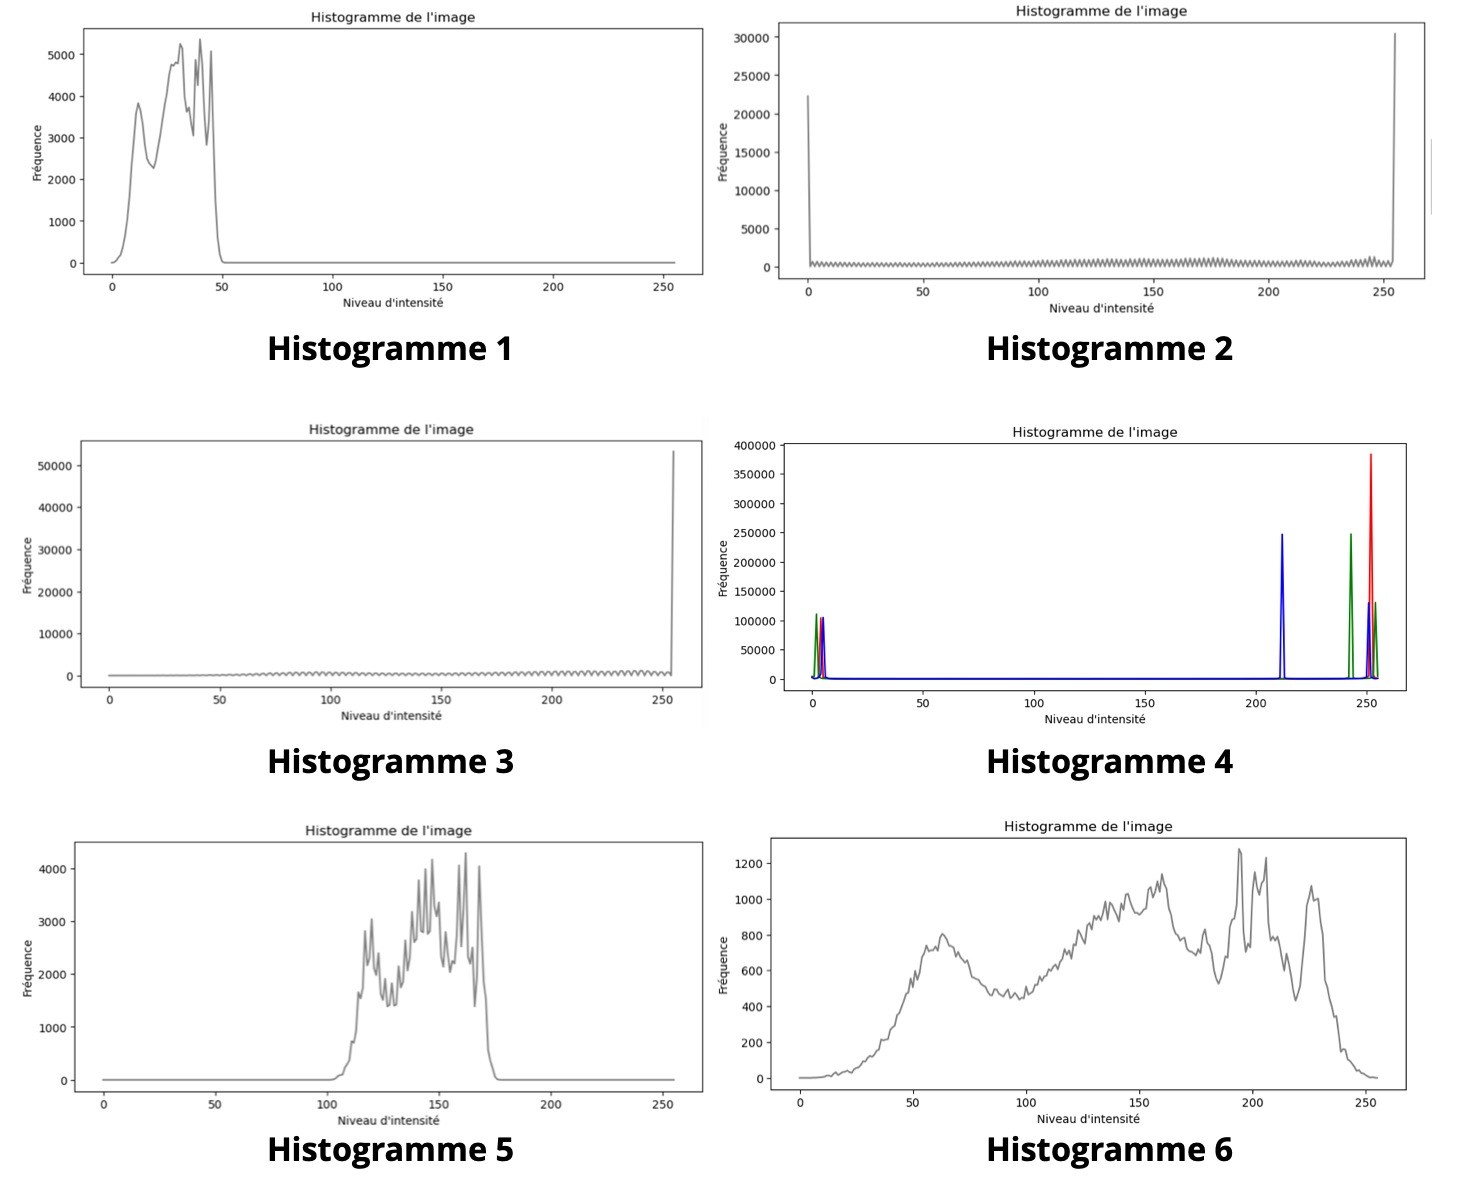

1er image : histogramme3
2eme image : belle image : histogramme 4
3eme image histogramme 6
4eme image: image trop sombre :histogramme2
5eme image: image trop grisante :histogramme5
6eme image = histogramme 1

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
2. Modifier l'image pour retrouver un histogramme
</div>

Faites les traitements necessaires sur l'image "chat-lion" pour retrouver les histogrammes ci-dessous

In [20]:
image = Image.open("C:/Users/oumar/Downloads/chat-lion-RGB.jpg")
image = np.asarray(image)
nb_lignes, nb_colonnes, _ = image.shape


image_sortie = np.copy(image)
# Ajuster cette valeur pour changer la luminosité
ajustement_luminosite = -100
for ligne in range(nb_lignes):
    for col in range(nb_colonnes):
        for i in range(3): # Pour chaque composante de couleur
            # Ajuster la luminosité avec une vérification pour rester dans l'intervalle [0, 255]
            nouvelle_valeur = image[ligne, col, i] + ajustement_luminosite
            image_sortie[ligne, col, i] = max(0, min(255, nouvelle_valeur))

image_sortie_obj = Image.fromarray(image_sortie.astype(np.uint8))
image_sortie_obj.show()

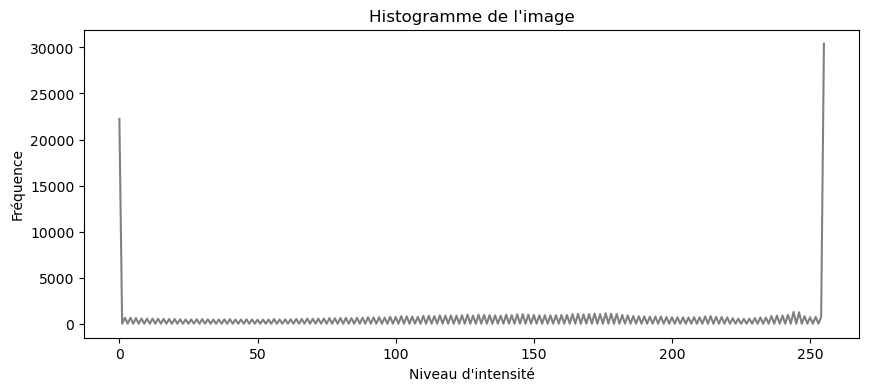

In [23]:

# Charger l'image 3 (grayscale)
image = Image.open("C:/Users/oumar/Downloads/chat-lion-RGB.jpg").convert("L")  

# Réduction du contraste et légère augmentation de la luminosité
image5 = ImageEnhance.Contrast(image).enhance(0.5)  # Réduction du contraste
image5 = ImageEnhance.Brightness(image5).enhance(1.2)  # Légère augmentation de la luminosité

# Sauvegarde ou affichage
image5.show()  # Pour afficher l'image
image5.save("image5.jpg")  # Pour sauvegarder

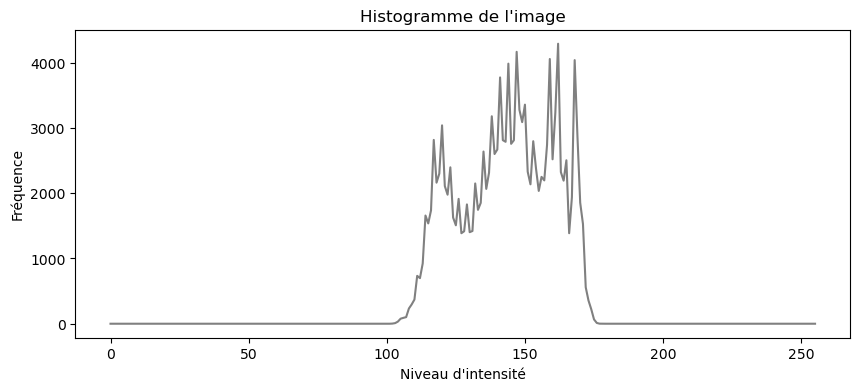

In [24]:


# Charger l'image 3 (grayscale)
image = Image.open("C:/Users/oumar/Downloads/chat-lion-RGB.jpg").convert("L")

# Réduction de la luminosité
image6 = ImageEnhance.Brightness(image).enhance(0.5)  # Assombrissement

# Sauvegarde ou affichage
image6.show()  # Pour afficher l'image
image6.save("image6.jpg")  # Pour sauvegarder

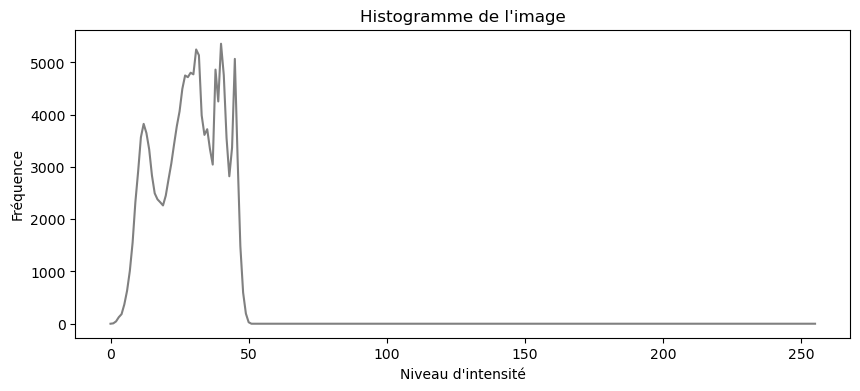

In [ ]:
# Modifier la luminosité
image = Image.open("C:/Users/oumar/Downloads/chat-lion-RGB.jpg")
enhancer = ImageEnhance.Brightness(image)
brightened_img = enhancer.enhance(2.5)  # >1 augmente la luminosité; <1 la dimininue.

# Afficher l'image avec la luminosité modifiée
brightened_img.show()

In [27]:
img = Image.open("C:/Users/oumar/Downloads/chat-lion.jpg")





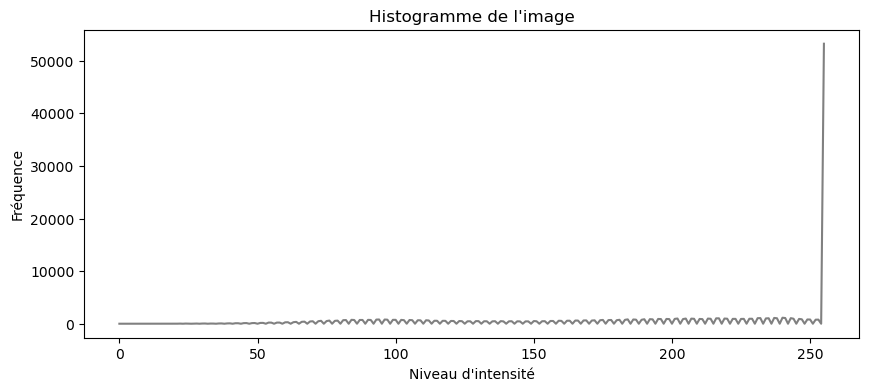

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
3. Normalisation
</div>

Codez une fonction qui normalise une image passé en argument

In [29]:

import numpy as np
from PIL import Image

def normalize_image(image_path):
    """
    Normalise l'image en ajustant les niveaux de pixels entre 0 et 255.
    :param image_path: Chemin de l'image à normaliser
    :return: Image normalisée (PIL)
    """
    # Charger l'image
    image = Image.open(image_path).convert("L")  # Convertir en niveaux de gris

    # Convertir l'image en tableau NumPy
    img_array = np.array(image, dtype=np.float32)

    # Normalisation : (valeur - min) / (max - min) * 255
    img_min, img_max = img_array.min(), img_array.max()
    normalized_array = (img_array - img_min) / (img_max - img_min) * 255

    # Convertir en image PIL
    normalized_image = Image.fromarray(normalized_array.astype(np.uint8))

    return normalized_image

# Exemple d'utilisation
normalized_img = normalize_image("C:/Users/oumar/Downloads/chat-lion.jpg")
normalized_img.show()  # Afficher l'image normalisée
normalized_img.save("image_normalized.jpg")  # Sauvegarder l'image

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
4. Quantification
</div>

Codez une fonction qui prend comme arguments une image et un nombre d'intervalles k et calcule la quantification de l'image. Vous devez obtenir les résultats ci-dessous avec l'image chat-lion.

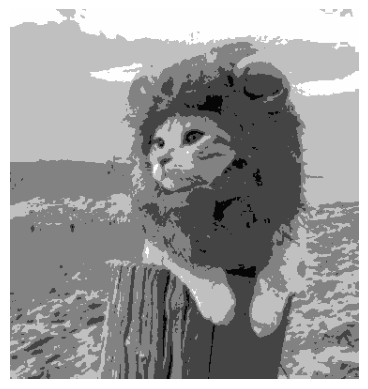

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def quantize_image(image_path, k):
    # Charger l'image
    image = Image.open(image_path)
    image = image.convert('RGB')
    
    # Convertir l'image en tableau numpy
    image_array = np.array(image)
    
    # Diviser chaque composant de couleur (R, G, B) en k intervalles
    image_quantized = np.zeros_like(image_array)
    
    # Appliquer la quantification de couleurs à chaque canal de l'image (R, G, B)
    for channel in range(3):
        # Créer des intervalles pour ce canal
        min_val = image_array[..., channel].min()
        max_val = image_array[..., channel].max()
        step = (max_val - min_val) / k
        
        # Appliquer la quantification
        image_quantized[..., channel] = np.round((image_array[..., channel] - min_val) / step) * step + min_val
    
    # Convertir l'image quantifiée en objet PIL pour l'affichage
    quantized_image = Image.fromarray(image_quantized.astype(np.uint8))
    
    return quantized_image

# Exemple d'utilisation
image_path = 'C:/Users/oumar/Downloads/chat-lion.jpg'  # Remplacez par le chemin de votre image
k = 4  # Nombre d'intervalles de quantification
quantized_image = quantize_image(image_path, k)

# Afficher l'image quantifiée
plt.imshow(quantized_image)
plt.axis('off')
plt.show()


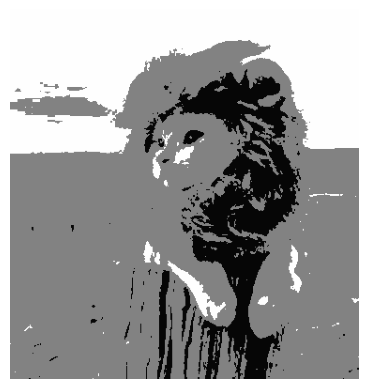

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def quantize_image(image_path, k):
    # Charger l'image
    image = Image.open(image_path)
    image = image.convert('RGB')
    
    # Convertir l'image en tableau numpy
    image_array = np.array(image)
    
    # Diviser chaque composant de couleur (R, G, B) en k intervalles
    image_quantized = np.zeros_like(image_array)
    
    # Appliquer la quantification de couleurs à chaque canal de l'image (R, G, B)
    for channel in range(3):
        # Créer des intervalles pour ce canal
        min_val = image_array[..., channel].min()
        max_val = image_array[..., channel].max()
        step = (max_val - min_val) / k
        
        # Appliquer la quantification
        image_quantized[..., channel] = np.round((image_array[..., channel] - min_val) / step) * step + min_val
    
    # Convertir l'image quantifiée en objet PIL pour l'affichage
    quantized_image = Image.fromarray(image_quantized.astype(np.uint8))
    
    return quantized_image

# Exemple d'utilisation
image_path = 'C:/Users/oumar/Downloads/chat-lion.jpg'  # Remplacez par le chemin de votre image
k = 2 # Nombre d'intervalles de quantification
quantized_image = quantize_image(image_path, k)

# Afficher l'image quantifiée
plt.imshow(quantized_image)
plt.axis('off')
plt.show()


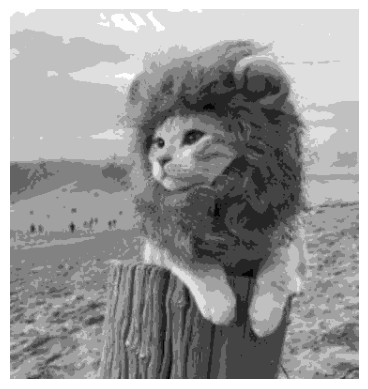

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def quantize_image(image_path, k):
    # Charger l'image
    image = Image.open(image_path)
    image = image.convert('RGB')
    
    # Convertir l'image en tableau numpy
    image_array = np.array(image)
    
    # Diviser chaque composant de couleur (R, G, B) en k intervalles
    image_quantized = np.zeros_like(image_array)
    
    # Appliquer la quantification de couleurs à chaque canal de l'image (R, G, B)
    for channel in range(3):
        # Créer des intervalles pour ce canal
        min_val = image_array[..., channel].min()
        max_val = image_array[..., channel].max()
        step = (max_val - min_val) / k
        
        # Appliquer la quantification
        image_quantized[..., channel] = np.round((image_array[..., channel] - min_val) / step) * step + min_val
    
    # Convertir l'image quantifiée en objet PIL pour l'affichage
    quantized_image = Image.fromarray(image_quantized.astype(np.uint8))
    
    return quantized_image

# Exemple d'utilisation
image_path = 'C:/Users/oumar/Downloads/chat-lion.jpg'  # Remplacez par le chemin de votre image
k = 8  # Nombre d'intervalles de quantification
quantized_image = quantize_image(image_path, k)

# Afficher l'image quantifiée
plt.imshow(quantized_image)
plt.axis('off')
plt.show()


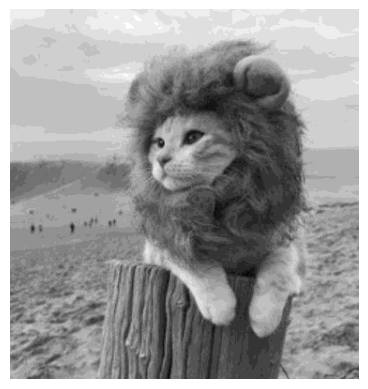

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def quantize_image(image_path, k):
    # Charger l'image
    image = Image.open(image_path)
    image = image.convert('RGB')
    
    # Convertir l'image en tableau numpy
    image_array = np.array(image)
    
    # Diviser chaque composant de couleur (R, G, B) en k intervalles
    image_quantized = np.zeros_like(image_array)
    
    # Appliquer la quantification de couleurs à chaque canal de l'image (R, G, B)
    for channel in range(3):
        # Créer des intervalles pour ce canal
        min_val = image_array[..., channel].min()
        max_val = image_array[..., channel].max()
        step = (max_val - min_val) / k
        
        # Appliquer la quantification
        image_quantized[..., channel] = np.round((image_array[..., channel] - min_val) / step) * step + min_val
    
    # Convertir l'image quantifiée en objet PIL pour l'affichage
    quantized_image = Image.fromarray(image_quantized.astype(np.uint8))
    
    return quantized_image

# Exemple d'utilisation
image_path = 'C:/Users/oumar/Downloads/chat-lion.jpg'  # Remplacez par le chemin de votre image
k = 16  # Nombre d'intervalles de quantification
quantized_image = quantize_image(image_path, k)

# Afficher l'image quantifiée
plt.imshow(quantized_image)
plt.axis('off')
plt.show()


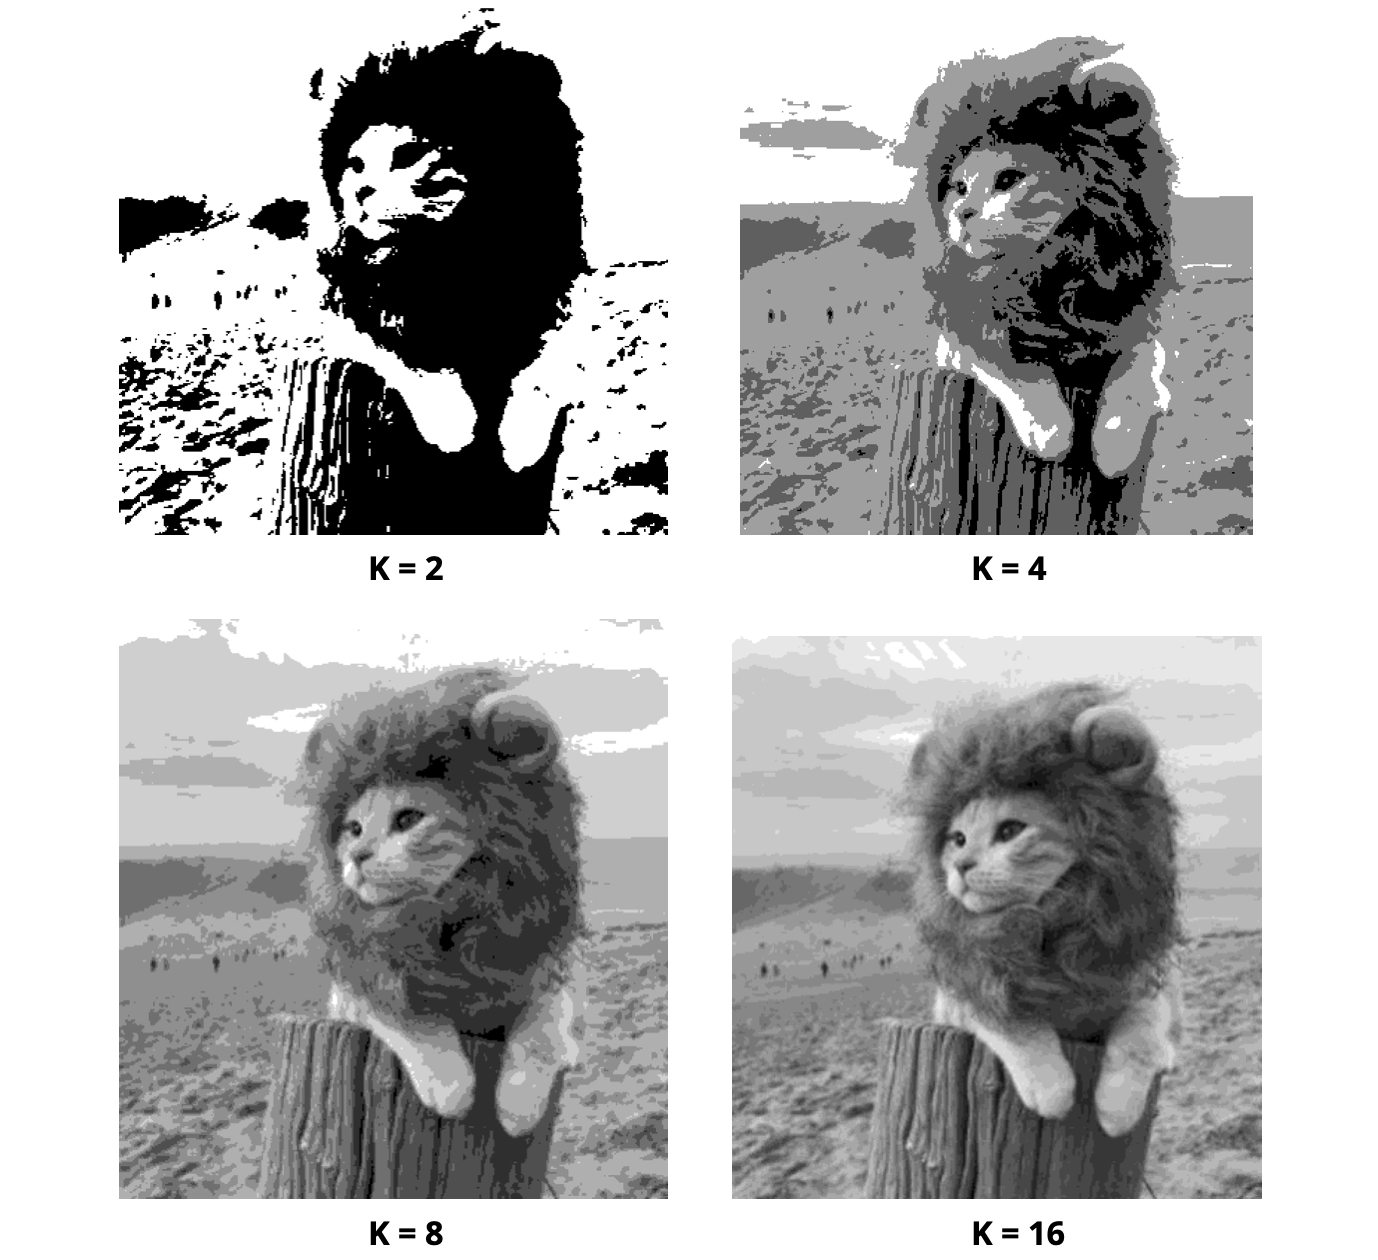